In [3]:
import numpy as np
import pandas as pd 
import edhec_risk_kit as erk 
%load_ext autoreload
%autoreload 2

C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [4]:
def bt_mix(r1, r2, allocator, **kwargs):
    """
    Runs a back test of allocating between a two sets of returns.
    r1 and r2 are T x N DataFrames of returns wher T is the timesetp index and N 
    is the number of scenarios. 
    allocator is a function that takes two sets of returns and allocator specific
    parameters and produces an allocation to the first portfolio as a Tx1 DataFrame
    Returnas a T x N DataFrame of the resulting N portfolio scenarios 
    """
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")
    weights = allocator(r1, r2, **kwargs)
    
    if not weights.shape == r1.shape:
        raise ValueError("Allocator returneweigths that dont match r1")
    
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix

In [5]:
def fixedmix_allocator(r1, r2, w1, **kwargs):
    """
    Produces a time series over T steps of allocations etween the PSP and GHP
    across N scenarios. 
    PSP and GHP are T x N DataFrames that represent the returns of the PSP and
    GHP such that:
      each column is the price for a time step
      each row is the price for a time step
    Returns an T x N DataFrame of PSP weights
    """
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)
    

In [6]:
rates , zc_prices = erk.cir(10, 500, b=0.03, r_0 = 0.03)
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_30 = erk.bond_price(30, 100, .05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)

In [7]:
price_10

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,...,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26
1,111.808,116.53,116.539,118.236,116.108,116.963,114.22,115.167,117.087,119.318,...,119.45,119.469,118.468,118.419,114.637,113.608,117.412,119.03,114.959,115.497
2,109.372,120.292,115.992,117.135,119.037,115.128,114.875,116.662,119.215,119.986,...,122.102,122.599,119.342,118.028,114.295,115.534,118.198,115.964,116.393,116.217
3,106.113,120.755,120.027,116.645,117.974,115.045,114.793,116.182,116.438,118.023,...,121.553,119.955,124.575,118.995,111.58,115.658,119.258,113.046,116.744,112.503
4,102.178,117.506,119.502,117.723,116.99,112.068,112.854,113.706,117.396,119.207,...,121.241,119.674,124.998,120.303,109.316,109.608,121.21,114.415,117.826,111.468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,99.6696,101.331,101.173,101.105,101.187,99.996,100.931,101.34,101.328,99.5964,...,99.5713,101.193,100.989,101.188,101.452,100.717,101.553,100.836,101.437,100.785
117,99.7569,100.955,100.857,100.814,100.945,100.001,100.71,101.04,101.058,99.679,...,99.7694,100.856,100.879,100.907,101.039,100.52,101.169,100.656,101.076,100.583
118,99.778,100.613,100.541,100.536,100.692,100.034,100.405,100.685,100.704,99.776,...,99.8796,100.546,100.556,100.624,100.682,100.395,100.775,100.514,100.727,100.373
119,99.8754,100.315,100.259,100.278,100.348,100.015,100.215,100.351,100.336,99.8384,...,99.9543,100.281,100.291,100.322,100.336,100.207,100.374,100.255,100.364,100.181


In [10]:
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator = fixedmix_allocator, w1 =0.3)

In [11]:
mean_rets_bonds = rets_bonds.mean(axis="columns")
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.038602,0.005166,0.012547,2.769546,-0.000718,-0.00018,1.620692,-0.001131


In [12]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [13]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator,
                       w1 = .7)
rets_7030b_mean = rets_7030b.mean(axis="columns")
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.06152,0.004961,0.090597,2.851506,-0.002675,-0.002069,6.183773,0.0


In [14]:
summaries = erk.summary_stats(rets_7030b)

In [15]:
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.089130,0.112155,-0.309447,3.210526,0.048013,0.060524,0.513009,-0.169833
1,0.037002,0.118485,0.373620,2.914913,0.048771,0.054363,0.057373,-0.267901
2,0.055399,0.108031,0.065266,2.387056,0.045904,0.054074,0.228698,-0.135668
3,0.052433,0.109201,0.079282,3.517804,0.045838,0.059866,0.199810,-0.244262
4,0.064571,0.106830,0.179131,3.246559,0.043083,0.056376,0.314835,-0.206639


In [16]:
summaries.mean()

Annualized Return          0.055766
Annualized Vol             0.109315
Skewness                   0.001874
Kurtosis                   2.942070
Cornish-Fisher VaR (5%)    0.046690
Historic CVaR (5%)         0.059090
Sharpe Ratio               0.230374
Max Drawdown              -0.208923
dtype: float64

In [19]:
def terminal_values(rets):
    """
    Returns the final values of a dollar at the end of the return period for
    each scenario
    """
    return (rets+1).prod()

In [21]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30")    
], axis=1)

,FI,Eq,70/30
mean,1.394433,1.970602,1.797912
std,0.199644,0.902964,0.569142
p_breach,0.002000,0.034000,0.008000
e_short,0.032445,0.120755,0.035663
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


C:\Users\fetet\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fetet\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fetet\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

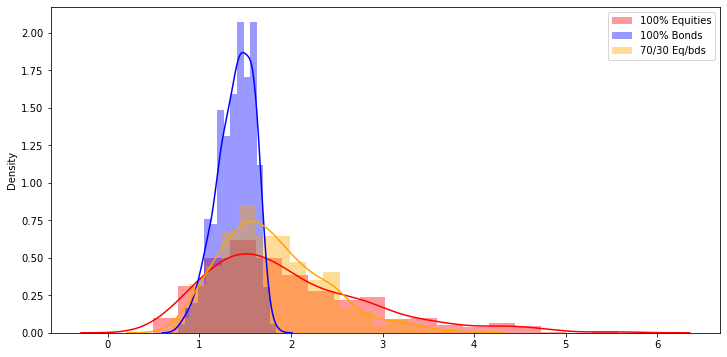

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
sns.distplot(erk.terminal_values(rets_eq), color="red", label="100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color="orange", label="70/30 Eq/bds")
plt.legend()

## Glide Paths for Allocation 

In [33]:
def glidepath_allocator(r1, r2, start_glide=1, end_glide=0):
    """
    Simulates a Target-Date-fund style gradual move from r1 to r2
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data = np.linspace(start_glide, end_glide, n_points))
    paths = pd.concat([path]*n_col, axis=1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [39]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, 
                       start_glide=.8, end_glide=.2)

In [41]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30"), 
     erk.terminal_stats(rets_g8020, name="80->20") 
    
], axis=1)

,FI,Eq,70/30,80->20
mean,1.394433,1.970602,1.797912,1.694197
std,0.199644,0.902964,0.569142,0.434671
p_breach,0.002000,0.034000,0.008000,NaN
e_short,0.032445,0.120755,0.035663,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
